<h3>Jeus Esteban Bustamante Apodaca 598557</h3>
<h3>P P2. Clasificación</h3>
"Doy mi palabra de que he realizado este proyecto con integridad academica"


<h3>1. Importa los datos de entrenamiento a tu ambiente de trabajo. Explora los datos: revisa si
se cuenta con variables cualitativas y/o cuantitativas, si se tienen huecos, la cantidad de
variables que se tiene, etc. No necesitas hacer una limpieza o preprocesamiento de la
base de datos, pero puedes hacerlo si así lo deseas</h3>

In [46]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train.csv')

print("############ Primeras filas de los datos de entrenamiento: ############")
print(train_data.head())
print("############ Informacion de los datos de entrenamiento: ############")
print(train_data.info())
print("############ Resumen estadistico: ############")
print(train_data.describe(include='all'))
print("############ Cantidad de variables nulas: ############")
print(train_data.isnull().sum())

#Eliminacion de valores nulos
train_data = train_data.dropna()



############ Primeras filas de los datos de entrenamiento: ############
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False 

<h3>2. Genera un modelo de regresión logística multinomial y evalúa la calidad del método
usando alguna forma de validación cruzada.</h3>

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def procesar_cabin(df):
    df[['Deck', 'Cabin_num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    return df

train_data = procesar_cabin(train_data)
X = train_data.drop(columns=['Transported', 'PassengerId', 'Name', 'Cabin'])
y = train_data['Transported']

X = pd.get_dummies(X)
log_modelo = LogisticRegression(max_iter=8000)
pipe_log = make_pipeline(StandardScaler(), log_modelo)
#Validacion cruzada K-fold CV
log_scores = cross_val_score(pipe_log, X, y, cv=5, scoring='accuracy')
print("Regresión logística Multinomial - Accuracy:", log_scores.mean())
print("Desviacion estandar del accuracy: ", log_scores.std())

Regresión logística Multinomial - Accuracy: 0.6849849000379076
Desviacion estandar del accuracy:  0.01775943245608436


<h3>3. Genera un modelo de LDA, evalúa la calidad del método usando alguna forma de
validación cruzada, y compara los resultados con la metodología anterior.</h3>

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_modelo = LinearDiscriminantAnalysis()
pipe_lda = make_pipeline(StandardScaler(), lda_modelo)
lda_scores = cross_val_score(pipe_lda, X, y, cv=5, scoring='accuracy')
print("LDA - Accuracy:", lda_scores.mean())
print("Desviacion estandar del accuracy: ", lda_scores.std())

LDA - Accuracy: 0.7010292253267079
Desviacion estandar del accuracy:  0.018277073634508124


<h3>4. Genera un modelo de árbol de decisión, evalúa la calidad del método usando alguna
forma de validación cruzada, y compara los resultados con las metodologías anteriores</h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params_tree = {'max_depth': [5, 10, 15]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), params_tree, cv=5, scoring='accuracy')
grid_tree.fit(X, y)
print("Arbol de decision - Accuracy:", grid_tree.best_score_)
print("Desviacion estandar del accuracy: ", grid_tree.cv_results_['std_test_score'][grid_tree.best_index_])

Arbol de decision - Accuracy: 0.7845938012851861
Desviacion estandar del accuracy:  0.015358414613745194


<h3>5. Genera un modelo de bagging, random forest o boosting, evalúa la calidad del método
usando alguna forma de validación cruzada, y compara los resultados con las
metodología anteriores. Si así lo prefieres, puedes realizar una comparación general al
final, en vez de ir comparando cada que se trabaja una metodología distinta.</h3>

In [ ]:
#Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(), params_rf, cv=5, scoring='accuracy')
grid_rf.fit(X, y)
print("Random Forest - Accuracy:", grid_rf.best_score_)
print("Desviacion estandar del accuracy: ", grid_rf.cv_results_['std_test_score'][grid_tree.best_index_])

Random Forest - Accuracy: 0.7960974872334602
Desviacion estandar del accuracy:  0.012463340459486383


<h3>Comparacion de Resultados de los Modelos</h3>

Regresion Logistica Multinomial  - Accuracy: 0.6849 - Desviacion estandar el accuracy: 0.01775

LDA - Accuracy: 0.7010 - Desviacion estandar el accuracy: 0.01827

Arbol de Decisiones - Accuracy: 0.7845 - Desviacion estandar el accuracy: 0.01535

Random Forest - Accuracy: 0.7960 - Desviacion estandar el accuracy: 0.01246

Viendo la calidad de cada modelo usando la metrica de accuracy o precision obtenida mediante el uso de validacion cruzada por k-folds y GridSearchCV, se puede apreciar que de los 4 modelos de Regresion Logistica, LDA, Arbol de Deciciones y Random Forest, el Random Forest tuvo un mejor rendimiento a comparacion de los otros modelos, si nos vamos por la metrica de la desviacion estandar del accuracy el que tiene mejor resultado seria igualmente el Random Forest.

Lo que se puede concluir por los resultados es que el que tiene mejor rendimiento de todos los modelos es Random Forest, tambien el hecho de que Random forest tiene menor variabilidad en su presicion, por lo que con las metricas que obtuvimos se puede concluir que el modelo mas optimo es el de Random Forest, por lo que es el modelo que se usara.

<h3>6. Selecciona o genera un nuevo modelo y úsalo para predecir la clase de los datos de
prueba. La calidad de tu modelo se medirá exclusivamente con la métrica de exactitud
(accuracy).</h3>

In [49]:
test_data = pd.read_csv('test.csv')
test_data = procesar_cabin(test_data)

X_test = test_data.drop(columns=['PassengerId', 'Name', 'Cabin'])
X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

params_mmrf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
mejor_modelo_rf = GridSearchCV(RandomForestClassifier(), params_mmrf, cv=5, scoring='accuracy')
mejor_modelo_rf.fit(X, y)
predicciones = mejor_modelo_rf.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'], 
    'Transported': predicciones
})
submission.to_csv('submission.csv', index=False)

<h3>Conclusion</h3>
En conclusion, en este proyecto se vieron muchos de los temas de este segundo parcial que fueron los que nos ayudaron en realizar este proyecto. Se hicieron los modelos de los cuales mediante validacion cruzada se pudo sacar la precision del modelo lo cual al usar la precision como metrica para escoger nuestro modelo, al final use Random Forest que fue capaz de superar a los demas modelos en cuestion de precision y estabilidad. 

La precision que tuvo el modelo final segun Kaggle fue de 0.79775, que es un valor parecido al obtenido usando la base de datos de entrenamiento. Aunque tuve ayuda del uso de ChatGPT en cuestion de arreglar y optimizar la base de datos debido a que la variable "Cabin" daba problemas en cuestion del procesamiento de los modelos, especialmente el de Random Forest. Para terminar al final aunque el modelo final no fue capaz de posicionarse en el top de 25%, aun asi me alegra que se haya posicionado bien en la leaderboard.

Referencias: OpenAI. (2025). Asistencia personalizada para proyecto de clasificación. ChatGPT. https://chat.openai.com/


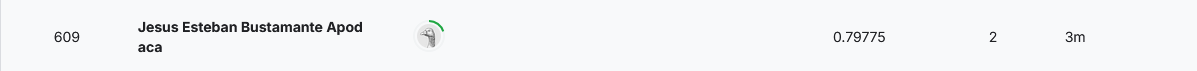